<a href="https://colab.research.google.com/github/wonjae124/2021_Lab_project/blob/main/mnist_standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import torch
from torchvision import datasets,transforms
from torch.utils.data.dataset import Dataset
from tqdm.notebook import tqdm
from time import time
import matplotlib.pyplot as plt

In [2]:
print(os.cpu_count())

2


In [55]:
N_CHANNELS = 1

dataset = datasets.MNIST("data", download = True,
                         train = True, transform = transforms.ToTensor())
full_loader = torch.utils.data.DataLoader(dataset, shuffle=False, num_workers=os.cpu_count())


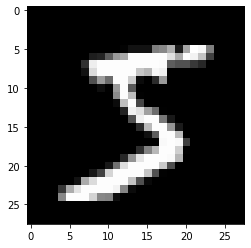

In [59]:
plt.imshow(dataset[0][0][0],'gray')

In [4]:
dataset[0][0].shape # channel, height, width

torch.Size([1, 28, 28])

In [5]:
before = time()
mean = torch.zeros(1)
std = torch.zeros(1)
print('==> Computing mean and std..')
for inputs, _labels in tqdm(full_loader):
    for i in range(N_CHANNELS): # i = 0
        mean[i] += inputs[:,i,:,:].mean() # (mini batch, channel, height, width)
        std[i] += inputs[:,i,:,:].std() # 이미지 한 장의 평균, 표준편차를 더하기 

==> Computing mean and std..


  0%|          | 0/60000 [00:00<?, ?it/s]

In [6]:
mean[0]

tensor(7839.5845)

In [7]:
std[0]

tensor(18090.2285)

In [8]:
mean.div_(len(dataset)) # div_ = torch.div(a,b) = a/b

tensor([0.1307])

In [9]:
std.div_(len(dataset))

tensor([0.3015])

In [10]:
print(mean,std)

tensor([0.1307]) tensor([0.3015])


In [11]:
print("time elapsed: ", time()-before)

time elapsed:  118.73661160469055


In [16]:
mnist_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean,std)]
)

In [17]:
standardization_dataset = datasets.MNIST("data", download = True,
                         train = True, transform = mnist_transform)
standardization_full_loader = torch.utils.data.DataLoader(standardization_dataset, shuffle=False, num_workers=os.cpu_count())

In [38]:
img,label = iter(standardization_full_loader).next()

In [40]:
print(img.shape)

torch.Size([1, 1, 28, 28])


In [41]:
print(label.shape)

torch.Size([1])


In [46]:
print(img[0].shape)

torch.Size([1, 28, 28])


In [47]:
print(img[0][0].shape)

torch.Size([28, 28])


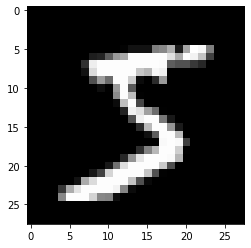

In [61]:
plt.imshow(img[0][0].numpy(),'gray')
# 보라색과 노란색이 나온 이유는 colormap 의 디폴트 값이 viridis 로 설정되어 있기 때문입니다. 색을 변경해보기 전에 설정되는 원리부터 알아봅시다. viridis라는 colormap은 최솟값이 보라, 최댓값이 노랑입니다.